# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('anime.csv')

# Data Cleaning and Preprocessing

## Finding 

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


### Finding Null Values

In [6]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### Plotting Null Values

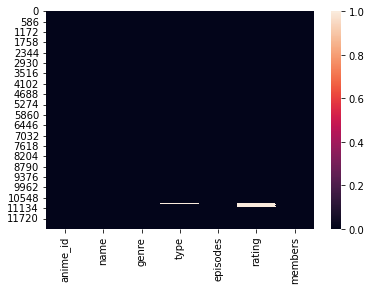

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.shape

(12294, 7)

### Finding % of Null Values

In [9]:
null_val=df.shape[0]-df.dropna().shape[0]

In [10]:
null_val/df.shape[0] * 100

2.253131608914918

##### Since its only 2.25%, we can drop it but let's try filling the ratings atleast if possible

In [11]:
df[df['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [12]:
for col in df:
  a=df[col].unique()
  if len(a)<20:
    print(col,a)

type ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


In [13]:
df = df.dropna()

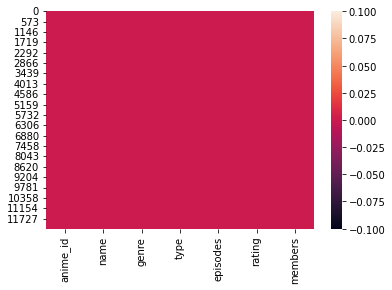

In [14]:
sns.heatmap(df.isnull())

## Filling Null Values

### Checking Null Values

In [15]:
w1 = pd.read_csv('anime.csv')

In [16]:
w1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [17]:
w1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

## Filling Type Columns

### Filling the null values of Type Column

In [18]:
len(w1[(w1['type'].isnull())])

25

In [19]:
w1[(w1['type'].isnull())].index

Int64Index([10898, 10900, 10906, 10907, 10918, 10949, 10963, 10983, 10988,
            10990, 10991, 10994, 10995, 10998, 11010, 11013, 11041, 11053,
            11055, 11058, 11062, 11070, 11101, 12252, 12259],
           dtype='int64')

In [20]:
w1[(w1['type'].isnull())]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,NaN,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


### Scraper to extract website using Anime ID and saving data in a dictionary for filling later

In [21]:
from bs4 import BeautifulSoup

import requests

In [22]:
def extractor(val):
  l=[]
  url='https://myanimelist.net/anime/'+str(val)
  req=requests.get(url)
  content=req.text
  soup=BeautifulSoup(content)
  rating = soup.find_all("div", {"class": "fl-l score"})
  rating=[]
  i=5
  while not rating:
    rating = soup.find_all("div", {"class": "score-label score-{}".format(i)})
    i+=1
  s=str(rating[0])
  print(s[33:37])
  l+=[s[33:37]]
  types = soup.find_all("div", {"class": "spaceit_pad"})

  # print(types)
  print('YESSSSSSSSSSSS')

  for i in types:
    s=str(i)
    a=''
    try:
      if s[118]=='T':
        a=s[118:120]
      else:
        a=s[118:123]
      break
    except:
      continue
  print(a)
  l+=[a]
  return l

In [23]:
datanull=w1[(w1['type'].isnull())]

In [24]:
datanull

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,NaN,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


In [25]:
indexes = datanull.index
indexes

Int64Index([10898, 10900, 10906, 10907, 10918, 10949, 10963, 10983, 10988,
            10990, 10991, 10994, 10995, 10998, 11010, 11013, 11041, 11053,
            11055, 11058, 11062, 11070, 11101, 12252, 12259],
           dtype='int64')

In [26]:
datanull['anime_id']

10898    30484
10900    34437
10906    33352
10907    33248
10918    33845
10949    33475
10963    31456
10983    34332
10988    34280
10990    34485
10991    32455
10994    31433
10995    28613
10998    34279
11010    33899
11013    34012
11041    30448
11053    34262
11055    33185
11058    24023
11062    34348
11070    32032
11101    33478
12252    34382
12259    33654
Name: anime_id, dtype: int64

In [27]:
d = {10898: [8.52,'TV'], 10900:[7.92,'Movie'], 10906:[8.96,'Movie'], 10907:[7.40,'Movie'], 10918:[7.35,'TV'], 10949:[6.91,'TV'], 10963:[6.65,'TV'],
     10983:[7.52,'TV'], 10988:[],10990:[], 10991:[], 10994:[], 10995:[], 10998:[], 11010:[], 11013:[], 11041:[], 11053:[],
            11055:[], 11058:[], 11062:[], 11070:[], 11101:[], 12252:[], 12259:[]}

In [28]:
# for i,val in zip(indexes[17:],datanull['anime_id']):
#   qqq=extractor(val)
#   print(qqq)
#   d[i]=qqq

In [29]:
d

{10898: [8.52, 'TV'],
 10900: [7.92, 'Movie'],
 10906: [8.96, 'Movie'],
 10907: [7.4, 'Movie'],
 10918: [7.35, 'TV'],
 10949: [6.91, 'TV'],
 10963: [6.65, 'TV'],
 10983: [7.52, 'TV'],
 10988: [],
 10990: [],
 10991: [],
 10994: [],
 10995: [],
 10998: [],
 11010: [],
 11013: [],
 11041: [],
 11053: [],
 11055: [],
 11058: [],
 11062: [],
 11070: [],
 11101: [],
 12252: [],
 12259: []}

#### Fixing the Type column

In [30]:
d={10898: [8.52, 'TV'],
 10900: [7.92, 'Movie'],
 10906: [8.96, 'Movie'],
 10907: [7.4, 'Movie'],
 10918: [7.35, 'TV'],
 10949: [6.91, 'TV'],
 10963: [6.65, 'TV'],
 10983: [7.52, 'TV'],
 10988: [8.52, 'TV'],
 10990: [7.92, 'Movie'],
 10991: [8.66, 'TV'],
 10994: [7.40, 'Movie'],
 10995: [7.56, 'Movie'],
 10998: [6.91, 'TV'],
 11010: [6.65, 'TV'],
 11013: [5.86, 'TV'],
 11041: [6.81, 'TV'],
 11053: [7.47, 'TV'],
 11055: [7.92, 'Movie'],
 11058: [8.66, 'TV'],
 11062: [7.40, 'Movie'],
 11070: [7.56, 'Movie'],
 11101: [6.91, 'TV'],
 12252: [6.65, 'TV'],
 12259: [5.86, 'TV']}

In [31]:
i2 = 'type'
i1 = 'rating'

In [32]:
for i in d:
  w1.loc[i,'rating']=d[i][0]
  w1.loc[i,'type']=d[i][1]

In [33]:
df2=pd.read_csv('anime.csv')

Comparing before and after filling

In [34]:
print(df2['type'].isnull().sum(),w1['type'].isnull().sum())
print(df2['rating'].isnull().sum(),w1['rating'].isnull().sum())

25 0
230 205


## Filling Episodes Values

In [35]:
len(w1[w1['episodes']=='Unknown'])

340

In [36]:
340/df.shape[0] * 100

2.829325122742781

In [37]:
ids = w1[w1['episodes']=='Unknown']['anime_id']

#### Scraper for Episodes filling

In [38]:
def extractor(val):
  l=[]
  url='https://myanimelist.net/anime/'+str(val)
  req=requests.get(url)
  content=req.text
  soup=BeautifulSoup(content)
  rating = soup.find_all("div", {"class": "fl-l score"})
  rating=[]
  i=5
  while not rating:
    rating = soup.find_all("div", {"class": "score-label score-{}".format(i)})
    i+=1
  s=str(rating[0])
  print(s[33:37])
  l+=[s[33:37]]
  types = soup.find_all("div", {"class": "spaceit_pad"})

  # print(types)
  print('YESSSSSSSSSSSS')

  for i in types:
    s=str(i)
    a=''
    try:
      if s[118]=='T':
        a=s[118:120]
      else:
        a=s[118:123]
      break
    except:
      continue
  print(a)
  l+=[a]
  return l

## Filling Rating Columns

### Scraper

In [39]:
def extractor_rating(val):
  url='https://myanimelist.net/anime/'+str(val)
  req=requests.get(url)
  content=req.text
  soup=BeautifulSoup(content)
  rating = soup.find_all("div", {"class": "fl-l score"})
  rating=[]
  # i=5 Forgot<4
  i=0
  while not rating and i<=9:
    rating = soup.find_all("div", {"class": "score-label score-{}".format(i)})
    i+=1
  if rating:
    s=str(rating[0])
    print(s[33:37])
    return s[33:37]
  else:
    print(0)
    return 0

### Filling

In [40]:
rate = w1[w1['rating'].isnull()]['anime_id']
indexes = w1[w1['rating'].isnull()].index

In [41]:
from time import sleep

In [42]:
c=0
for i,val in zip(indexes,rate):
  rate_str=extractor_rating(val)
  if rate_str == 0:
    continue
  w1.loc[i,'rating']=rate_str
  sleep(2)

6.26
0
8.99
7.45
8.50
8.18
8.28
7.37
7.18
7.78
7.58
7.05
6.75
0
6.28
7.66
7.82
0
8.20
6.51
8.23
7.83
7.20
6.34
6.40
6.57
5.29
7.07
6.39
6.66
7.59
6.65
6.73
5.92
7.67
0
6.52
5.23
7.11
7.38
7.12
4.15
0
5.64
6.83
6.13
6.97
7.00
7.06
7.66
7.65
7.23
6.45
6.59
7.03
7.04
0
5.64
5.17
0
6.53
6.45
6.35
6.89
6.93
6.91
6.48
7.57
7.67
5.38
7.29
7.38
7.28
6.91
6.42
8.66
7.53
6.74
7.95
8.54
8.72
6.93
6.39
6.98
7.46
5.49
0
0
6.23
6.46
0
0
7.15
7.49
6.29
6.02
7.23
7.80
6.77
6.88
6.55
5.67
6.67
6.43
6.32
6.62
5.93
6.34
7.54
6.61
6.43
6.89
7.62
8.81
7.09
8.00
7.52
7.53
8.08
8.25
7.06
0
0
7.86
7.44
7.46
6.69
6.19
6.30
0
0
7.26
3.27
5.35
7.41
6.64
0
5.38
6.61
5.56
7.31
7.09
7.60
5.87
6.25
5.59
6.89
6.65
7.16
4.75
7.21
7.39
7.35
5.79
5.71
6.29
7.59
8.19
0
0
7.43
0
8.75
7.69
5.72
7.31
7.06
7.32
5.77
7.32
0
6.72
6.63
5.12
0
0
0
5.35
7.26
0
7.05
6.70
6.08
8.11
7.65
7.12
0
6.53
0
5.76
7.97
6.18
6.79
7.67
7.66
7.31
5.52
6.47
4.64
6.82
6.37
6.24
6.29
7.30
6.48


In [43]:
w1['rating'].isnull().sum()

26

#### Finding animes without rating

In [48]:
26/w1.shape[0] * 100

0.21148527737107534

In [49]:
w1.isnull().sum()

anime_id     0
name         0
genre       62
type         0
episodes     0
rating      26
members      0
dtype: int64

#### Saving Cleaned Data

In [50]:
w1.to_csv('anime_filled_type.csv')

In [51]:
w1.to_csv('anime_filled_rating.csv')

## Filling Genre Columns

In [52]:
w1.isnull().sum()

anime_id     0
name         0
genre       62
type         0
episodes     0
rating      26
members      0
dtype: int64

In [53]:
w1[w1['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,Movie,Unknown,7.56,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,6.70,843
11112,33035,Yuyushiki Special,NaN,Special,1,7.31,2294


### Scraper

In [54]:
def extractor_genre(val):
  url='https://myanimelist.net/anime/'+str(val)
  req=requests.get(url)
  content=req.text
  soup=BeautifulSoup(content)
  types = soup.find_all("div", {"class": "spaceit_pad"})
  s=''
  i=0
  try:
    while True:
      tit = types[i].find_all("span")
      check = tit[0]
      if 'Genres:' in check:
        tit=tit[1:]
        break
      i+=1
  except:
    # print('0')
    return '00'
  for i in tit:
    sss=str(i)
    s+=sss[45:45+sss[44:].index('<')-1]+','
  # print(s)
  return s


In [55]:
qwe = extractor_genre(29765)

In [56]:
qwe[:-1]

'0'

In [57]:
gen = w1[w1['genre'].isnull()]['anime_id']
indexes = w1[w1['genre'].isnull()].index

In [58]:
c=0
for i,val in zip(indexes,gen):
  genres_str=extractor_genre(val)[:-1]
  print(genres_str)
  if genres_str=='0':
    continue
  w1.loc[i,'genre']=genres_str
  sleep(2)

Comedy,Romance
Action,Drama
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Drama,Fantasy
Comedy,Slice of Life
0
0
0
Fantasy,Romance
0
0
0
0
0
Comedy,Slice of Life
0


In [59]:
w1['genre'].isnull().sum()

56

In [60]:
w1=w1.dropna()

In [61]:
w1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [73]:
w1.to_csv('anime_cleaned.csv')

## Filing Unknown Episodes

In [75]:
len(w1[w1['episodes']=='Unknown'])

319

# Exploratory Data Analysis

## EDA

In [62]:
test = df.groupby(df['type']).sum()

In [63]:
test

,anime_id,rating,members
type,,,
Movie,32241935,14308.63,23865229
Music,10953427,2727.43,640178
ONA,14979543,3661.39,2705539
OVA,36609618,20936.85,19755618
Special,27731504,10893.62,12846511
TV,41371833,25321.38,160685404


In [64]:
test=test.sort_values(by='members',ascending=False)

In [65]:
test = test.reset_index()

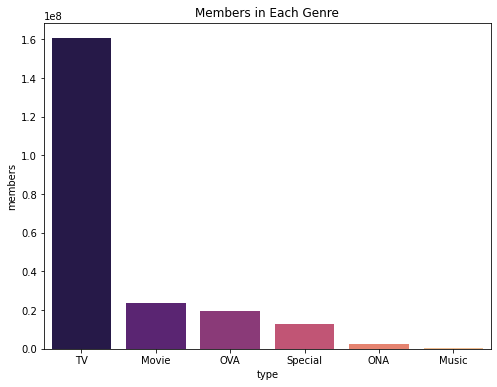

In [66]:
plt.figure(figsize=(8,6));
sns.barplot(x='type',y='members',data=test,ci=None,palette='magma');
plt.title('Members in Each Genre');

As we can see, the TV genre has the highest members

In [67]:
df1=df.copy()

In [68]:
df1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [69]:
top10 = df1.sort_values(by='rating',ascending=False)[:10]

In [70]:
top10['name'] = top10['name'].str.slice(stop=20)

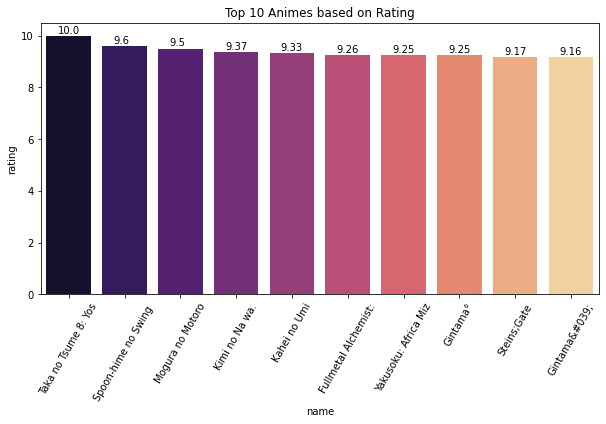

In [71]:
plt.figure(figsize=(10,5));
sns.barplot(x='name',y='rating',data=top10,palette='magma');
plt.xticks(rotation=60);
j=-0.2
for i in top10['rating']:
  plt.text(x=j,y=float(i)+0.1,s=i);
  j+=1
plt.title('Top 10 Animes based on Rating');